In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#使用numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]

noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

In [3]:
#定义两个placeholder
#batch_size：一个batch中含有的样本数
x = tf.placeholder(tf.float32,[None,1])#[batch_size, 特征数]
y = tf.placeholder(tf.float32,[None,1])

## 定义神经网络层

注：一个神经网络层的实质就是进行一个矩阵乘积，then一个激活函数

这里的矩阵乘积 的熟悉是 x * w + b

这是因为常规的做法是批量训练 会把batch_size放在第一个维度[batch_size, 特征数]， 这就导致了输入向量x必须看做是**行向量**！

In [4]:
#定义神经网络中间层
#tf.random_normal([1,10])作用类似于np.random.normal(size=[1,10])
#但是这里是lazy_load，只是做了一个标记，并没有实际计算
Weights_L1 = tf.Variable(tf.random_normal([1,10]))#[1,10] = [输入神经元个数, 输出神经元个数]
# Weights_L1 = tf.Variable(np.random.normal(size=[1,10]))#报错，类型不匹配
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

#定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

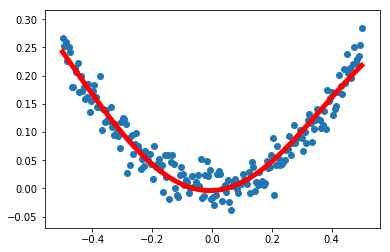

In [6]:
with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()